<a href="https://colab.research.google.com/github/Vigneshkumarcvk/Final-Project-GUVI/blob/main/Project_1_Conversion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Packages

In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

Loading Data

In [286]:
df = pd.read_csv("train.csv")

In [287]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [288]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


Cleaning

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [290]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [291]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [292]:
df.shape

(45211, 11)

In [293]:
 df['job'].nunique(),df['marital'].nunique(),df['education_qual'].nunique(),df['call_type'].nunique(),df['prev_outcome'].nunique(),df['mon'].nunique(),df['day'].nunique(),df['num_calls'].nunique()

(12, 3, 4, 3, 4, 12, 31, 48)

In [294]:
df.job.unique(),df.prev_outcome.unique(), df.marital.unique(),df.education_qual.unique(),df.call_type.unique(),df.mon.unique()

(array(['management', 'technician', 'entrepreneur', 'blue-collar',
        'unknown', 'retired', 'admin.', 'services', 'self-employed',
        'unemployed', 'housemaid', 'student'], dtype=object),
 array(['unknown', 'failure', 'other', 'success'], dtype=object),
 array(['married', 'single', 'divorced'], dtype=object),
 array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object),
 array(['unknown', 'cellular', 'telephone'], dtype=object),
 array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
        'mar', 'apr', 'sep'], dtype=object))

In [295]:
df.age.unique(),df.num_calls.unique(),df.day.unique(),df.dur.unique()

(array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
        25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
        27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
        69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
        95, 81, 18, 89, 84, 87, 92, 93, 88]),
 array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
        32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
        20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44]),
 array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
        29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31]),
 array([ 261,  151,   76, ..., 1298, 1246, 1556]))

In [296]:
df.value_counts()

age  job          marital  education_qual  call_type  day  mon  dur  num_calls  prev_outcome  y 
29   admin.       single   secondary       unknown    2    jun  121  4          unknown       no    2
39   blue-collar  married  primary         unknown    19   jun  112  4          unknown       no    2
36   management   married  tertiary        cellular   8    aug  75   2          unknown       no    2
34   services     married  secondary       unknown    28   may  124  1          unknown       no    2
36   blue-collar  married  secondary       cellular   9    jul  183  1          unknown       no    2
                                                                                                   ..
35   admin.       married  secondary       cellular   13   may  249  2          failure       no    1
                                                      14   may  125  1          failure       no    1
                                                                171  4          unknown

In [297]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [298]:
df['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [299]:
df['mon'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [300]:
df['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [301]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [302]:
df["call_type"].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

In [303]:
df["education_qual"].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

In [304]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [305]:
df['Target'] = df['y'].map({'yes':1, 'no':0})

In [306]:
df.groupby('prev_outcome')['Target'].mean()

prev_outcome
failure    0.126097
other      0.166848
success    0.647253
unknown    0.091615
Name: Target, dtype: float64

In [307]:
IQR = df['age'].quantile(0.75)-df['age'].quantile(0.25)
upper = df.age.quantile(0.75) + (1.5*IQR)
lower = df.age.quantile(0.25) + (1.5*IQR)
upper,lower

(70.5, 55.5)

In [308]:
IQR = df['dur'].quantile(0.75)-df['dur'].quantile(0.25)
upper = df.dur.quantile(0.75) + (1.5*IQR)
lower = df.dur.quantile(0.25) + (1.5*IQR)
upper,lower

(643.0, 427.0)

In [309]:
IQR = df['num_calls'].quantile(0.75)-df['num_calls'].quantile(0.25)
upper = df.num_calls.quantile(0.75) + (1.5*IQR)
lower = df.num_calls.quantile(0.25) + (1.5*IQR)
upper,lower

(6.0, 4.0)

In [310]:
IQR = df['dur'].quantile(0.75)-df['dur'].quantile(0.25)
upper = df.dur.quantile(0.75) + (1.5*IQR)
lower = df.dur.quantile(0.25) + (1.5*IQR)
upper,lower

(643.0, 427.0)

In [311]:
df.describe()

,age,day,dur,num_calls,Target
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841,0.116985
std,10.618762,8.322476,257.527812,3.098021,0.321406
min,18.000000,1.000000,0.000000,1.000000,0.000000
25%,33.000000,8.000000,103.000000,1.000000,0.000000
50%,39.000000,16.000000,180.000000,2.000000,0.000000
75%,48.000000,21.000000,319.000000,3.000000,0.000000
max,95.000000,31.000000,4918.000000,63.000000,1.000000


In [312]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,Target
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no,0


EDA

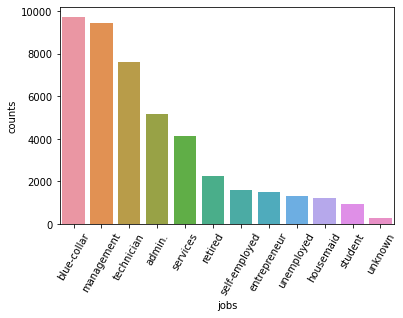

In [313]:
df_job = pd.DataFrame(df.job.value_counts()).sort_values('job', ascending = False).reset_index()
df_job.rename(columns = {"index":"jobs","job":"counts"},inplace = True)
bar = sns.barplot(x =df_job["jobs"],y=df_job["counts"],data = df_job)
bar.tick_params(axis='x',rotation = 60)

<AxesSubplot:ylabel='job'>

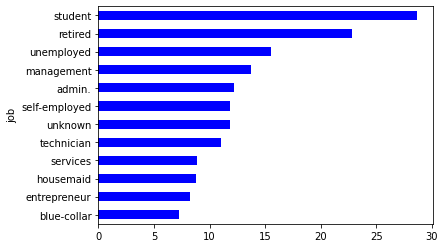

In [314]:
(df.groupby("job")['Target'].mean()*100).sort_values().plot(kind = 'barh', color = 'blue')

<AxesSubplot:ylabel='education_qual'>

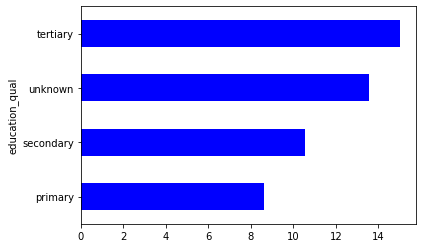

In [315]:
(df.groupby("education_qual")['Target'].mean()*100).sort_values().plot(kind = 'barh', color = 'blue')

<AxesSubplot:ylabel='marital'>

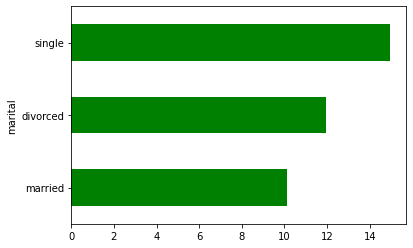

In [316]:
(df.groupby("marital")['Target'].mean()*100).sort_values().plot(kind = 'barh', color = 'green')

<AxesSubplot:ylabel='call_type'>

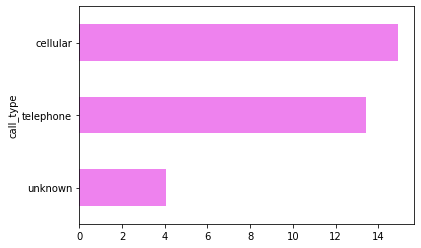

In [317]:
(df.groupby("call_type")['Target'].mean()*100).sort_values().plot(kind = 'barh', color = 'violet')

<AxesSubplot:ylabel='mon'>

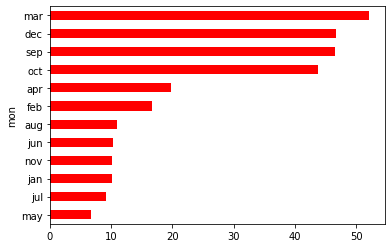

In [318]:
(df.groupby("mon")['Target'].mean()*100).sort_values().plot(kind = 'barh', color = 'red')

<AxesSubplot:ylabel='prev_outcome'>

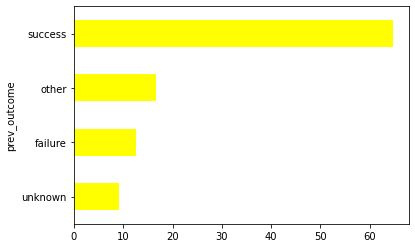

In [319]:
(df.groupby("prev_outcome")['Target'].mean()*100).sort_values().plot(kind = 'barh', color = 'yellow')

Encoding

In [320]:
## Encode labels in column 'job'
df['job'] = df['job'].map({'blue-collar':1, 'entrepreneur':2, 'housemaid':3, 'services':4, 'technician':5, 'self-employed':6, 'admin':7, 'management':8, 'unemployed':9, 'retired':10, 'student':11})
## Encode labels in column 'marital'
df['marital'] = df['marital'].map({'married':1,'divorced':2, 'single':3,})
## Encode labels in column 'education_qual'
df['education_qual'] = df['education_qual'].map({'primary': 1, 'secondary':2, 'tertiary':3})
## Encode labels in column 'call_type'
df['call_type'] =df['call_type'].map({'unknown':1, 'telephone':2, 'cellular':3})
## Encode labels in column 'mon'
df['mon'] = df['mon'].map({'may':1, 'jul':2, 'jan':3, 'nov':4, 'jun':5, 'aug':6, 'feb':7, 'apr':8, 'oct':9, 'sep':10, 'dec':11, 'mar':12})
## Encode labels in column 'prev_outcome'
df['prev_outcome'] = df['prev_outcome'].map({'unknown':1, 'failure':2, 'other':3, 'success':4})
## Encode labels in column 'y'
df['y'] = df['y'].map({'no':0, 'yes':1})
## Delete the 'target' column
del df['Target']
## Fill the all missing value in the dataset with value '0'
df.fillna(0, inplace=True)
## To display the dataset
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,8.0,1,3.0,1,5,1,261,1,1,0
1,44,5.0,3,2.0,1,5,1,151,1,1,0
2,33,2.0,1,2.0,1,5,1,76,1,1,0
3,47,1.0,1,0.0,1,5,1,92,1,1,0
4,33,0.0,3,0.0,1,5,1,198,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,5.0,1,3.0,3,17,4,977,3,1,1
45207,71,10.0,2,1.0,3,17,4,456,2,1,1
45208,72,10.0,1,2.0,3,17,4,1127,5,4,1
45209,57,1.0,1,2.0,2,17,4,508,4,1,0


In [321]:
df.shape

(45211, 11)

In [322]:
col = [*df.columns]
col[:-2]

['age',
 'job',
 'marital',
 'education_qual',
 'call_type',
 'day',
 'mon',
 'dur',
 'num_calls']

In [323]:
x = df.iloc[:, :-1]    
y = df.iloc[:, -1 ]

In [324]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25) 

Balancing the Data

In [325]:
df.shape

(45211, 11)

In [326]:
len(x_train),len(y_train)

(33908, 33908)

In [327]:
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy="all")

In [328]:
x_train, y_train = smt.fit_resample(x_train, y_train)

In [329]:
len(x_train),len(y_train)

(51491, 51491)

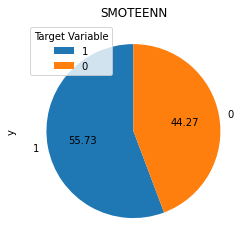

In [330]:
y_train.value_counts().plot.pie(autopct='%.2f',startangle = 90)  ## To plot the pieplot for the Target variable - 'y'
plt.title("SMOTEENN")     ## To set the name to Title of the Figure
plt.legend(title = "Target Variable")  ## To show legend & name to the legend
plt.show()    ## To show the Final plot 

Scaling

In [331]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [332]:
x_train

array([[-0.44010199,  0.97018518, -0.75785123, ..., -0.77669092,
        -0.12612604, -0.5074375 ],
       [ 1.43923416, -0.55835358, -0.75785123, ..., -0.35634611,
         0.63967268, -0.5074375 ],
       [-0.78179947,  0.97018518,  1.60786672, ..., -0.91492512,
         1.02257204, -0.5074375 ],
       ...,
       [-0.61095073, -0.09306192,  0.42500775, ..., -0.06012998,
        -0.12612604,  3.18702417],
       [ 1.52465853,  1.51096413, -0.75785123, ...,  0.2530128 ,
        -0.50902541,  1.95553695],
       [-0.44010199,  1.16415652,  1.60786672, ..., -0.19272196,
        -0.50902541,  3.18702417]])

In [333]:
x_test

array([[ 0.92668794,  0.35876968,  1.60786672, ..., -0.55946575,
        -0.50902541, -0.5074375 ],
       [ 0.58499046, -0.25264582, -0.75785123, ...,  0.08938865,
         1.78837077, -0.5074375 ],
       [ 0.1578686 , -1.47547683, -0.75785123, ..., -0.50022252,
        -0.12612604, -0.5074375 ],
       ...,
       [-1.03807258, -0.25264582, -0.75785123, ..., -0.39302049,
         0.25677332, -0.5074375 ],
       [ 1.35380979, -1.47547683,  0.42500775, ...,  0.97803706,
        -0.50902541, -0.5074375 ],
       [-0.01298014,  0.05306193, -0.75785123, ...,  0.0668198 ,
        -0.12612604, -0.5074375 ]])

Model Selection

In [334]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import xgboost as xgp
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score

In [335]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
LR.score(x_test, y_test)
lr = roc_auc_score(y_test, LR.predict_proba(x_test)[:, 1])
lr

0.8850250663154314

In [336]:
for i in range(1,20,2):
  knn = KNeighborsClassifier(i)
  knn.fit(x_train, y_train)
  print('k-value:', i, 'Train-Score:', knn.score(x_train,y_train) )

k-value: 1 Train-Score: 1.0
k-value: 3 Train-Score: 0.9691790798391952
k-value: 5 Train-Score: 0.9563224641199433
k-value: 7 Train-Score: 0.9492921093006544
k-value: 9 Train-Score: 0.9433493231826922
k-value: 11 Train-Score: 0.9387659979413878
k-value: 13 Train-Score: 0.9350177700957449
k-value: 15 Train-Score: 0.9314054883377678
k-value: 17 Train-Score: 0.9277543648404576
k-value: 19 Train-Score: 0.925695752655804


In [337]:
'''for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60]
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_test)
print('K-value:' i, "Accurancy Score:", KNN>score(x_train,y_smt), 'Cross-Val Score:', np.mean(cross_val_score(KNN,x_train, y_)smt, cv =10)))'''

'for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60]\nKNN = KNeighborsClassifier()\nKNN.fit(x_train,y_test)\nprint(\'K-value:\' i, "Accurancy Score:", KNN>score(x_train,y_smt), \'Cross-Val Score:\', np.mean(cross_val_score(KNN,x_train, y_)smt, cv =10)))'

In [338]:
kn = KNeighborsClassifier(9)
kn.fit(x_train, y_train)
y_predict_knn = kn.predict(x_test)

print('Train-Score:', kn.score(x_test, y_test))
print('Train-Score:', kn.score(x_test, y_test))
print('AUROC Score:', roc_auc_score(y_test, y_predict_knn))

Train-Score: 0.8154472264000707
Train-Score: 0.8154472264000707
AUROC Score: 0.8242467402717776


In [339]:
for depth in range(1,31):
  dt = DecisionTreeClassifier(max_depth=depth)
  dt.fit(x_train, y_train)
  trainaccuracy = accuracy_score(y_train, dt.predict(x_train)) 
  dt = DecisionTreeClassifier(max_depth=depth)
  valaccuracy = cross_val_score(dt, x_train, y_train, cv=10)
  print('Depth:',depth, 'Training Accuracy:',trainaccuracy, 'CV_Score:', np.mean(valaccuracy))

Depth: 1 Training Accuracy: 0.7758637431784196 CV_Score: 0.7757278536505344
Depth: 2 Training Accuracy: 0.8086850129148784 CV_Score: 0.8047230398210982
Depth: 3 Training Accuracy: 0.8587520149152279 CV_Score: 0.8558582211269226
Depth: 4 Training Accuracy: 0.8648501679905226 CV_Score: 0.8621700886400789
Depth: 5 Training Accuracy: 0.8784253558874366 CV_Score: 0.8783477609942171
Depth: 6 Training Accuracy: 0.896583869025655 CV_Score: 0.8932048979253207
Depth: 7 Training Accuracy: 0.9112854673632286 CV_Score: 0.9071880900617899
Depth: 8 Training Accuracy: 0.9214620030684975 CV_Score: 0.9146652512411686
Depth: 9 Training Accuracy: 0.9354256083587423 CV_Score: 0.9249389098081068
Depth: 10 Training Accuracy: 0.9436017944883572 CV_Score: 0.9310954262020903
Depth: 11 Training Accuracy: 0.953739488454293 CV_Score: 0.9369024355751989
Depth: 12 Training Accuracy: 0.9628284554582354 CV_Score: 0.9395631916462239
Depth: 13 Training Accuracy: 0.9721698937678429 CV_Score: 0.9420296937665341
Depth: 14 

In [340]:
tr = DecisionTreeClassifier(max_depth=15)
tr.fit(x_train, y_train)
y_predict_dt = tr.predict(x_test)

print('Training Accuracy:', tr.score(x_train, y_train))
print('Test Accuracy    :', tr.score(x_test, y_test))
print('AUROC Score      :',roc_auc_score(y_test, y_predict_dt))

Training Accuracy: 0.9861723407974209
Test Accuracy    : 0.8307528974608511
AUROC Score      : 0.7912041447504827


In [341]:
tree = RandomForestClassifier(n_estimators=100,max_depth=6, max_features='sqrt')
tree.fit(x_train,y_train)
y_pred_rf = tree.predict(x_test)

print("Training Accuracy :",tree.score(x_train,y_train))
print("Testing Accuracy  :",tree.score(x_test,y_test))
print("AUROC Score       :", roc_auc_score(y_test,y_pred_rf))

Training Accuracy : 0.9210541648055
Testing Accuracy  : 0.7679377156507122
AUROC Score       : 0.8200086802724843


In [342]:
for lr in [0.01,0.02,0.03,0.04,0.05,0.09,0.1,0.2,0.5,0.7,1]:
    model = XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) 
    model.fit(x_train,y_train) 
    model.score(x_test, y_test) 
    print('Learning rate :', lr, 'Train score :', model.score(x_train,y_train), 'CV_Score :', np.mean(cross_val_score(model, x_train, y_train, cv=10))) 

Learning rate : 0.01 Train score : 0.9223359422034919 CV_Score : 0.919054211676506
Learning rate : 0.02 Train score : 0.9308228622477714 CV_Score : 0.927580033449798
Learning rate : 0.03 Train score : 0.9414460779553708 CV_Score : 0.936979909380085
Learning rate : 0.04 Train score : 0.9488454292983239 CV_Score : 0.9434084325922463
Learning rate : 0.05 Train score : 0.9546911110679536 CV_Score : 0.9485163147901279
Learning rate : 0.09 Train score : 0.9669262589578761 CV_Score : 0.9580134930526618
Learning rate : 0.1 Train score : 0.9685381911401992 CV_Score : 0.9594118718499397
Learning rate : 0.2 Train score : 0.9794527198927968 CV_Score : 0.9651412867424535
Learning rate : 0.5 Train score : 0.9931638538773766 CV_Score : 0.9692197108685445
Learning rate : 0.7 Train score : 0.9965430851993552 CV_Score : 0.9693945548857636
Learning rate : 1 Train score : 0.9990289565166728 CV_Score : 0.9688313651250974


In [343]:
tree = XGBClassifier(learning_rate = 0.16, n_estimators=100, verbosity = 0)
tree.fit(x_train,y_train)
y_pred_x = tree.predict(x_test)

print("Training Accuracy :",tree.score(x_train,y_train))
print("Testing Accuracy :",tree.score(x_test,y_test))
print("AUCROC Score :", roc_auc_score(y_test,y_pred_x))

Training Accuracy : 0.9750830242178244
Testing Accuracy : 0.8662302043705211
AUCROC Score : 0.8444598081239645


In [344]:
from sklearn.ensemble import VotingClassifier
from sklearn import tree
m1 = LogisticRegression(random_state = 15)
m2 = KNeighborsClassifier(5)
m3 = tree.DecisionTreeClassifier(random_state = 15)
m4 = XGBClassifier(learning_rate = 0.75, estimator = 100, verbosity = 0)
m5 = RandomForestClassifier( max_depth = 6, max_features = 'sqrt')
m = VotingClassifier(estimators = [('lr',m1),('dt',m2),('knn',m3),('xgb',m4), ('rf',m5)], voting = 'soft')

In [345]:
m.fit(x_train, y_train)
y_pred = m.predict(x_test)
v = roc_auc_score(y_test,m.predict_proba(x_test)[:, 1])


In [346]:
estimator = []
estimator.append(('LR', 
                  LogisticRegression(solver ='lbfgs', 
                                     multi_class ='multinomial', 
                                     max_iter = 200)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))
estimator.append(('KNN', KNeighborsClassifier()))
estimator.append(('RF', RandomForestClassifier()))
estimator.append(('XGB', XGBClassifier()))

In [ ]:
# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(x_train, y_train)
y_pred = vot_soft.predict(x_test)
  
# using accuracy_score
score = accuracy_score(y_test, y_pred)
print("Soft Voting Score % d" % score)

In [ ]:
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(x_train, y_train)
y_pred = vot_hard.predict(x_test)
  
# using accuracy_score metric to predict accuracy
score = accuracy_score(y_test, y_pred)
print("Hard Voting Score % d" % score)